In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import os

#path = '/content/drive/My Drive/Colab Notebooks/Mini-Projet/sensor_data_processed_normalizing_the_label_with_hot_encoding_index.csv'

path = '/content/drive/My Drive/Orange4Home/sensor_data_processed_normalizing_the_label_with_hot_encoding_timestamps_normalizing.csv'


In [9]:
data = pd.read_csv(path, index_col='Time',parse_dates=True)

In [10]:
data.head()

,Timestamps,bedroom_switch_middle_left,entrance_heater_effective_setpoint,bedroom_switch_middle_right,kitchen_noise,livingroom_couch_plug_consumption,global_snow_ext,bedroom_heater1_effective_setpoint,global_lighting_power,livingroom_heater2_base_setpoint,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-30 07:58:30,0.000000e+00,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:32,9.126727e-07,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:33,1.369009e-06,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:36,2.738018e-06,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-30 07:58:38,3.650691e-06,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
training_labels = ['Timestamps','bedroom_switch_middle_left',
 'entrance_heater_effective_setpoint',
 'bedroom_switch_middle_right',
 'kitchen_noise',
 'livingroom_couch_plug_consumption',
 'global_snow_ext',
 'bedroom_heater1_effective_setpoint',
 'global_lighting_power',
 'livingroom_heater2_base_setpoint',
 'kitchen_dishwasher_current',
 'toilet_coldwater_total',
 'kitchen_hood_voltage',
 'kitchen_washingmachine_partial_energy',
 'walkway_switch2_bottom_left',
 'livingroom_shutter5',
 'kitchen_hood_total_energy',
 'bathroom_heater_command',
 'walkway_noise',
 'entrance_noise',
 'livingroom_shutter4',
 'livingroom_switch2_top_left',
 'global_rain_ext',
 'global_wind_speed_ext',
 'global_waterheater_total_energy',
 'global_lighting_current',
 'livingroom_heater2_temperature',
 'livingroom_tv_status',
 'office_tv_plug_consumption',
 'kitchen_fridge_power',
 'bedroom_closet_door',
 'bathroom_luminosity',
 'livingroom_tv_plug_consumption',
 'office_AC_setpoint',
 'bathroom_switch_bottom_right',
 'bedroom_light4',
 'office_heater_effective_mode',
 'global_lighting_total_energy',
 'kitchen_cupboard3',
 'toilet_switch_left',
 'entrance_heater_base_setpoint',
 'office_heater_command',
 'bedroom_light2',
 'livingroom_table_luminosity',
 'global_voltage',
 'bedroom_temperature',
 'kitchen_fridge_door',
 'bathroom_sink_coldwater_total',
 'global_lighting_partial_energy',
 'livingroom_couch_noise',
 'global_temperature_feel_ext',
 'livingroom_humidity',
 'kitchen_oven_current',
 'livingroom_presence_table',
 'bathroom_switch_bottom_left',
 'livingroom_heater1_command',
 'staircase_light',
 'office_noise',
 'kitchen_sink_hotwater_total',
 'bathroom_switch_top_right',
 'bedroom_switch_bottom_left',
 'livingroom_presence_couch',
 'livingroom_heater2_effective_setpoint',
 'bedroom_presence',
 'toilet_switch_right',
 'bedroom_humidity',
 'livingroom_heater1_effective_mode',
 'bedroom_heater2_effective_setpoint',
 'livingroom_heater2_command',
 'bedroom_shutter1',
 'global_active_power',
 'walkway_switch1_bottom_left',
 'kitchen_hood_current',
 'entrance_heater_temperature',
 'bedroom_CO2',
 'livingroom_table_plug_consumption',
 'bathroom_CO2',
 'bathroom_temperature',
 'bedroom_drawer1',
 'office_switch_right',
 'global_heaters_temperature',
 'global_waterheater_current',
 'kitchen_dishwasher_voltage',
 'global_shutters_voltage',
 'walkway_switch1_bottom_right',
 'livingroom_heater1_effective_setpoint',
 'livingroom_light1',
 'bathroom_heater_temperature',
 'kitchen_cooktop_current',
 'entrance_switch_left',
 'toilet_coldwater_instantaneous',
 'kitchen_oven_voltage',
 'bathroom_sink_hotwater_instantaneous',
 'staircase_switch_right',
 'kitchen_sink_coldwater_instantaneous',
 'livingroom_heater2_effective_mode',
 'office_tv_status',
 'global_shutters_current',
 'kitchen_fridge_current',
 'kitchen_washingmachine_total_energy',
 'bedroom_shutter2',
 'bathroom_light2',
 'global_waterheater_partial_energy',
 'global_frequency',
 'kitchen_switch_bottom_right',
 'bedroom_door',
 'kitchen_luminosity',
 'bedroom_heater2_command',
 'entrance_heater_command',
 'global_pressure_ext',
 'kitchen_oven_partial_energy',
 'global_shutters_power',
 'office_luminosity',
 'kitchen_cooktop_total_energy',
 'kitchen_washingmachine_voltage',
 'bathroom_light1',
 'bedroom_luminosity',
 'office_presence',
 'bathroom_heater_effective_setpoint',
 'bathroom_shower_hotwater_instantaneous',
 'livingroom_switch1_top_left',
 'bathroom_humidity',
 'kitchen_cupboard5',
 'bathroom_shower_coldwater_total',
 'bathroom_shower_coldwater_instantaneous',
 'office_window',
 'kitchen_switch_bottom_left',
 'kitchen_dishwasher_partial_energy',
 'kitchen_fridge_voltage',
 'office_heater_effective_setpoint',
 'office_heater_temperature',
 'livingroom_window1',
 'bathroom_sink_hotwater_total',
 'kitchen_cooktop_voltage',
 'kitchen_hood_power',
 'kitchen_sink_hotwater_instantaneous',
 'global_current',
 'global_condition_id_ext',
 'livingroom_switch1_top_right',
 'office_AC_mode',
 'bedroom_heater2_effective_mode',
 'walkway_light',
 'bathroom_door',
 'global_clouds_ext',
 'global_shutters_total_energy',
 'bedroom_heater1_effective_mode',
 'bedroom_light1',
 'kitchen_cupboard1',
 'livingroom_temperature',
 'livingroom_CO2',
 'global_shutters_partial_energy',
 'bathroom_shower_hotwater_total',
 'kitchen_switch_top_right',
 'kitchen_cooktop_partial_energy',
 'global_waterheater_power',
 'kitchen_sink_coldwater_total',
 'kitchen_oven_total_energy',
 'global_power_factor',
 'kitchen_washingmachine_current',
 'global_coldwater_instantaneous',
 'office_desk_plug_consumption',
 'livingroom_switch1_bottom_left',
 'entrance_door',
 'global_active_energy',
 'global_coldwater_total',
 'bathroom_heater_effective_mode',
 'office_light',
 'walkway_switch1_top_right',
 'global_humidity_ext',
 'livingroom_AC_setpoint',
 'walkway_switch2_top_right',
 'bathroom_switch_top_left',
 'kitchen_cupboard2',
 'office_heater_base_setpoint',
 'bedroom_light3',
 'kitchen_dishwasher_total_energy',
 'livingroom_shutter3',
 'kitchen_light2',
 'kitchen_cooktop_power',
 'office_switch_left',
 'toilet_light',
 'livingroom_shutter2',
 'bathroom_presence',
 'livingroom_light2',
 'bedroom_switch_top_right',
 'livingroom_heater1_temperature',
 'bedroom_switch_top_left',
 'walkway_switch1_top_left',
 'livingroom_switch2_top_right',
 'walkway_switch2_bottom_right',
 'kitchen_dishwasher_power',
 'global_heaters_setpoint',
 'bedroom_AC_setpoint',
 'kitchen_temperature',
 'bedroom_heater2_temperature',
 'kitchen_fridge_partial_energy',
 'bedroom_switch_bottom_right',
 'office_shutter',
 'bedroom_drawer2',
 'global_temperature_ext',
 'bedroom_heater1_command',
 'bathroom_heater_base_setpoint',
 'bedroom_bed_pressure',
 'livingroom_table_noise',
 'global_lighting_voltage',
 'office_switch_middle',
 'global_gas_total',
 'global_waterheater_status',
 'office_door',
 'kitchen_washingmachine_power',
 'staircase_switch_left',
 'bedroom_heater2_base_setpoint',
 'entrance_heater_effective_mode',
 'bedroom_heater1_temperature',
 'entrance_light1',
 'livingroom_shutter1',
 'livingroom_heater1_base_setpoint',
 'kitchen_CO2',
 'walkway_switch2_top_left',
 'kitchen_switch_top_left',
 'kitchen_fridge_total_energy',
 'bathroom_shower_door',
 'bedroom_heater1_base_setpoint',
 'kitchen_light1',
 'kitchen_hood_partial_energy',
 'global_waterheater_voltage',
 'kitchen_cupboard4',
 'bathroom_sink_coldwater_instantaneous',
 'bedroom_noise',
 'kitchen_humidity',
 'kitchen_oven_power',
 'kitchen_presence',
 'livingroom_luminosity',
 'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW',
 'down',
 'equal',
 'up',
 'Couvert',
 'brouillard',
 'brume',
 'ensoleillé',
 'légères pluies',
 'nuageux',
 'partiellement ensoleillé',
 'peu nuageux',
 'cloudy',
 'few-showers',
 'fog',
 'mostly-cloudy-day',
 'partly-cloudy-day',
 'sunny']

In [12]:
classes_labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [13]:
X = data[training_labels]

In [14]:
y = data[classes_labels]

In [15]:
y = y.values

In [16]:
X = X.values

In [17]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size = 0.3)

In [19]:
x_train.shape

(268599, 266, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, InputLayer, GRU
from keras.optimizers import RMSprop, SGD, Adam

import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_CUDNN'] = '1'

from keras.layers import CuDNNLSTM



# hyper-parameters
num_classes = 25
input_shape = (x_train.shape[1],)
hidden_nodes= (x_train.shape[1]+num_classes)/2
input_nodes = x_train.shape[1]

model = Sequential()
# first layer with 
model.add(InputLayer((len(training_labels), 1)))
model.add(Dense(int(input_nodes), activation='tanh'))


#model.add(LSTM(int(input_nodes), activation='tanh', return_sequences=True))
model.add(GRU(int(input_nodes), activation='tanh'))
#model.add(LSTM(int(hidden_nodes), activation='tanh'))

# Dropout of 50%
model.add(Dropout(0.5))

# L
model.add(Dense(hidden_nodes, activation='tanh'))

#model.add(Dense(int(hidden_nodes/2), activation='tanh'))


# Classification Layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 266, 266)          532       
                                                                 
 gru (GRU)                   (None, 266)               426132    
                                                                 
 dropout (Dropout)           (None, 266)               0         
                                                                 
 dense_1 (Dense)             (None, 145)               38715     
                                                                 
 dense_2 (Dense)             (None, 25)                3650      
                                                                 
Total params: 469,029
Trainable params: 469,029
Non-trainable params: 0
_________________________________________________________________


In [21]:
sgd = SGD(learning_rate=0.05,  momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
batch_size = 34
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
7900/7900 [==============================] - 175s 21ms/step - loss: 1.4179 - accuracy: 0.6714 - val_loss: 0.5663 - val_accuracy: 0.8202
Epoch 2/10
7900/7900 [==============================] - 173s 22ms/step - loss: 0.2611 - accuracy: 0.9240 - val_loss: 0.1335 - val_accuracy: 0.9615
Epoch 3/10
7900/7900 [==============================] - 173s 22ms/step - loss: 0.1322 - accuracy: 0.9605 - val_loss: 0.1034 - val_accuracy: 0.9692
Epoch 4/10
7900/7900 [==============================] - 171s 22ms/step - loss: 0.1050 - accuracy: 0.9670 - val_loss: 0.0857 - val_accuracy: 0.9712
Epoch 5/10
7900/7900 [==============================] - 172s 22ms/step - loss: 0.0897 - accuracy: 0.9700 - val_loss: 0.0749 - val_accuracy: 0.9744
Epoch 6/10
7900/7900 [==============================] - 171s 22ms/step - loss: 0.0840 - accuracy: 0.9724 - val_loss: 0.0728 - val_accuracy: 0.9760
Epoch 7/10
7900/7900 [==============================] - 171s 22ms/step - loss: 0.0801 - accuracy: 0.9739 - val_loss: 0

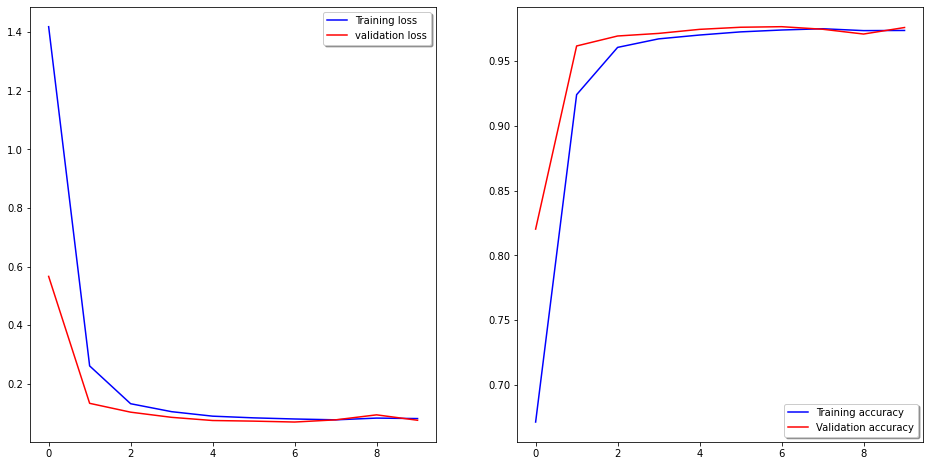

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07576879113912582
Test accuracy: 0.975792646408081


In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07958576083183289
Test accuracy: 0.9748572707176208


In [26]:
# Classification
y_pred = model.predict(x_test)

y_pred

2519/2519 [==============================] - 23s 9ms/step


array([[6.1948349e-08, 1.7993516e-07, 9.3786502e-07, ..., 1.6940654e-05,
        3.4516805e-07, 5.7196146e-05],
       [2.6327876e-07, 2.2518803e-07, 4.0098502e-07, ..., 8.2155520e-06,
        3.0953819e-07, 3.6030171e-05],
       [6.2240346e-08, 1.4469629e-07, 1.0108403e-06, ..., 1.6410506e-05,
        4.3244620e-07, 5.3323802e-05],
       ...,
       [1.5291661e-07, 6.2745994e-07, 1.3978970e-06, ..., 1.3191176e-07,
        4.3945019e-07, 3.6138485e-06],
       [1.0213228e-07, 1.1606655e-06, 1.6111602e-06, ..., 3.2016716e-05,
        4.1472589e-07, 4.9643440e-04],
       [1.8978895e-07, 3.2236699e-06, 5.7993893e-05, ..., 5.0995173e-04,
        3.8578211e-05, 4.9425694e-03]], dtype=float32)

In [27]:

for i in range(0,len(y_pred)):
# Get the index of the maximum value in the output list
  max_index = np.argmax(y_pred[i])
  # Create a binary vector with the maximum value as 1 and other values as 0
  y_pred[i] = np.zeros(len(y_pred[i]))

  y_pred[i][max_index] = 1
     

In [28]:
labels = ['Bathroom|Cleaning',
 'Bathroom|Showering',
 'Bathroom|Using_the_sink',
 'Bathroom|Using_the_toilet',
 'Bedroom|Cleaning',
 'Bedroom|Dressing',
 'Bedroom|Napping',
 'Bedroom|Reading',
 'Entrance|Entering',
 'Entrance|Leaving',
 'Kitchen|Cleaning',
 'Kitchen|Cooking',
 'Kitchen|Preparing',
 'Kitchen|Washing_the_dishes',
 'Living_room|Cleaning',
 'Living_room|Computing',
 'Living_room|Eating',
 'Living_room|Watching_TV',
 'Office|Cleaning',
 'Office|Computing',
 'Office|Watching_TV',
 'Staircase|Going_down',
 'Staircase|Going_up',
 'Toilet|Using_the_toilet',
 'Transition']

In [29]:
df_pred = pd.DataFrame( y_pred,columns=labels)

In [30]:
df_pred

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
original_array_pred = df_pred.idxmax(axis=1)

In [32]:
original_array_pred

0          Office|Computing
1          Office|Computing
2          Office|Computing
3           Bedroom|Napping
4          Office|Computing
                ...        
80575      Office|Computing
80576       Kitchen|Cooking
80577       Kitchen|Cooking
80578      Office|Computing
80579    Living_room|Eating
Length: 80580, dtype: object

In [33]:

df_test = pd.DataFrame( y_test,columns=labels)
original_array_test = df_test.idxmax(axis=1)
original_array_test

0          Office|Computing
1          Office|Computing
2          Office|Computing
3           Bedroom|Napping
4          Office|Computing
                ...        
80575      Office|Computing
80576       Kitchen|Cooking
80577       Kitchen|Cooking
80578      Office|Computing
80579    Living_room|Eating
Length: 80580, dtype: object

In [34]:
cm = confusion_matrix(original_array_test,original_array_pred)

In [35]:
df_cm = pd.DataFrame( cm,columns=labels, index=labels)

In [36]:
df_cm

,Bathroom|Cleaning,Bathroom|Showering,Bathroom|Using_the_sink,Bathroom|Using_the_toilet,Bedroom|Cleaning,Bedroom|Dressing,Bedroom|Napping,Bedroom|Reading,Entrance|Entering,Entrance|Leaving,...,Living_room|Computing,Living_room|Eating,Living_room|Watching_TV,Office|Cleaning,Office|Computing,Office|Watching_TV,Staircase|Going_down,Staircase|Going_up,Toilet|Using_the_toilet,Transition
Bathroom|Cleaning,31,0,58,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,0,1
Bathroom|Showering,0,2561,15,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,3,0,3
Bathroom|Using_the_sink,0,325,588,0,0,0,0,0,0,0,...,0,3,0,0,1,0,0,15,0,14
Bathroom|Using_the_toilet,0,0,34,199,0,0,0,0,0,0,...,0,0,0,0,5,0,1,2,0,1
Bedroom|Cleaning,0,0,0,0,40,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Bedroom|Dressing,0,0,0,2,1,252,8,23,0,0,...,0,7,1,0,0,0,0,1,1,8
Bedroom|Napping,0,0,0,0,0,12,2897,1,0,0,...,0,6,0,0,0,0,0,2,0,9
Bedroom|Reading,0,0,0,0,0,28,0,3257,0,0,...,0,0,0,0,0,0,0,0,0,0
Entrance|Entering,0,0,0,0,0,0,0,0,197,77,...,0,0,2,0,0,0,0,0,0,14
Entrance|Leaving,0,0,0,0,0,0,0,0,17,156,...,0,1,0,0,0,0,1,1,0,15


In [37]:
df_cm.to_csv("confusion_matrix_GRU.csv",index=True)


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert one-hot encoded labels to original label format
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision for each class
precision = precision_score(y_true_labels, y_pred_labels, average=None)
print("Precision:", precision)

# Calculate recall for each class
recall = recall_score(y_true_labels, y_pred_labels, average=None)
print("Recall:", recall)

# Calculate F-measure (F1 score) for each class
f1 = f1_score(y_true_labels, y_pred_labels, average=None)
print("F1 score:", f1)

Accuracy: 0.9748572846860263
Precision: [0.96875    0.88128011 0.82700422 0.98029557 0.93023256 0.77300613
 0.9948489  0.98667071 0.89545455 0.62650602 1.         0.99413333
 0.69577465 0.91337825 0.31121281 0.99873897 0.88042381 0.98975256
 0.74757282 0.9991738  1.         0.81081081 0.64227642 0.94308943
 0.70950704]
Recall: [0.32978723 0.99071567 0.62156448 0.82231405 0.95238095 0.82894737
 0.9897506  0.99147641 0.67931034 0.81675393 0.09090909 0.98208641
 0.81788079 0.92405063 0.72727273 0.93396226 0.93116329 0.9939759
 0.93902439 0.99859253 0.9790795  0.37735849 0.78606965 0.87878788
 0.6883006 ]
F1 score: [0.49206349 0.93279913 0.70971635 0.89438202 0.94117647 0.8
 0.9922932  0.98906772 0.77254902 0.70909091 0.16666667 0.98807315
 0.75190259 0.91868345 0.43589744 0.96526508 0.90508299 0.99185974
 0.83243243 0.99888308 0.98942918 0.51502146 0.70693512 0.90980392
 0.69874296]


In [45]:
# y_true and y_pred are your true and predicted labels, respectively
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

# Calculate the weighted average of precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

In [48]:
weights = np.sum(y_test, axis=0)
precision_weighted = np.sum(precision * weights) / np.sum(weights)
recall_weighted = np.sum(recall * weights) / np.sum(weights)
f1_score_weighted = np.sum(f1_score * weights) / np.sum(weights)

print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 score:", f1_score_weighted)

Precision: 0.9774750790701464
Recall: 0.9748572846860263
F1 score: 0.9748232031810885
